# ABOUT dataset :
 This is the IMDB  movies dataset it contain IMDB score ,Name of the movie, cast of the movie ,revenue ,budget etc.. 

# HERE :
 We build    MOVIE RECOMMENDATION  SYSTEM    and some PREDICTION MODEL .
 EDA and VISUALIZATION


<div style="
    padding: 20px;
    color: #4b4Ab;
    margin: 20px;
    font-size: 30px;
    display: block;
    border-radius: 10px;
    border: 2px solid RED;
    background-color: #f0ebec;
    overflow: hidden;
    font-weight: 600;
    box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
">
    <strong style="color:BLACK;padding : 200px">Welcome to Notebook</strong>
</div>


<div style="
    padding: 20px;
    color: #4A4A4A;
    margin: 20px;
    font-size: 18px;
    display: inline-block;
    border-radius: 10px;
    border: 2px solid #3498DB;
    background-color: #ECF0F1;
    overflow: hidden;
    font-weight: 600;
    box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
">
    <strong style="color: #34A8sB;">Importing Modules for EDA and Visualization</strong>
</div>


In [1]:
# Importing basic libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Reading data
data=pd.read_csv("/kaggle/input/imdb-movies-dataset/imdb_movies.csv")
data.head(5)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [3]:
# Check the basic information by using "info()"  like datatype,non-nullvalues
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [4]:
# find shape of data (row,column)
data.shape

(10178, 12)

In [5]:
# to describe max ,min, mean, median ,etc...
data.describe()

,score,budget_x,revenue
count,10178.000000,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08
std,13.537012,5.707565e+07,2.777880e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.858898e+07
50%,65.000000,5.000000e+07,1.529349e+08
75%,71.000000,1.050000e+08,4.178021e+08
max,100.000000,4.600000e+08,2.923706e+09


In [6]:
# check no of null values in ecah column
data.isnull().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [7]:
# check number of unique values in each column
pd.DataFrame(data.nunique())

,0
names,9660
date_x,5688
score,79
genre,2303
overview,9905
crew,9927
orig_title,9736
status,3
orig_lang,54
budget_x,2316


In [8]:
# to find duplicate values in  "orig_title"column

duplicate=data[data.duplicated("orig_title")]
duplicate["orig_title"].value_counts()

orig_title
Pinocchio    11
Halloween     8
King Kong     8
Scream        5
After         5
             ..
 Hayat        1
Revenge       1
Cars          1
Cashback      1
Payback       1
Name: count, Length: 268, dtype: int64

In [9]:
# drop that duplicate values row
data.drop_duplicates(subset="orig_title",inplace=True)


In [10]:
data.isnull().sum()

names          0
date_x         0
score          0
genre         81
overview       0
crew          53
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [11]:
# convert the "date_x" dtype from : Object ---to--> Datetime 
data["date_x"]=data["date_x"].str.strip()
data["date_x"]=pd.to_datetime(data["date_x"],format="%m/%d/%Y")
# Split year and month in seperate columns
data["Release_year"]=data["date_x"].dt.year
data["Release_month"]=data["date_x"].dt.month

In [12]:
# Drop null value rows
data=data.dropna()

In [13]:
# After eda and data cleaning process: create one reference copy for build recomendation system
recom_data=data.copy()


<div style="
    padding: 20px;
    color: #ed0e28;
    margin: 20px;
    font-size: 28px;
    display: inline-block;
    border-radius: 10px;
    border: 2px solid #3498DB;
    background-color:#6ef5cf;
    overflow: hidden;
    font-weight: 600;
    box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
">
    <strong style="color: #f50288;">Visualization and Time Series Analysis</strong>
</div>


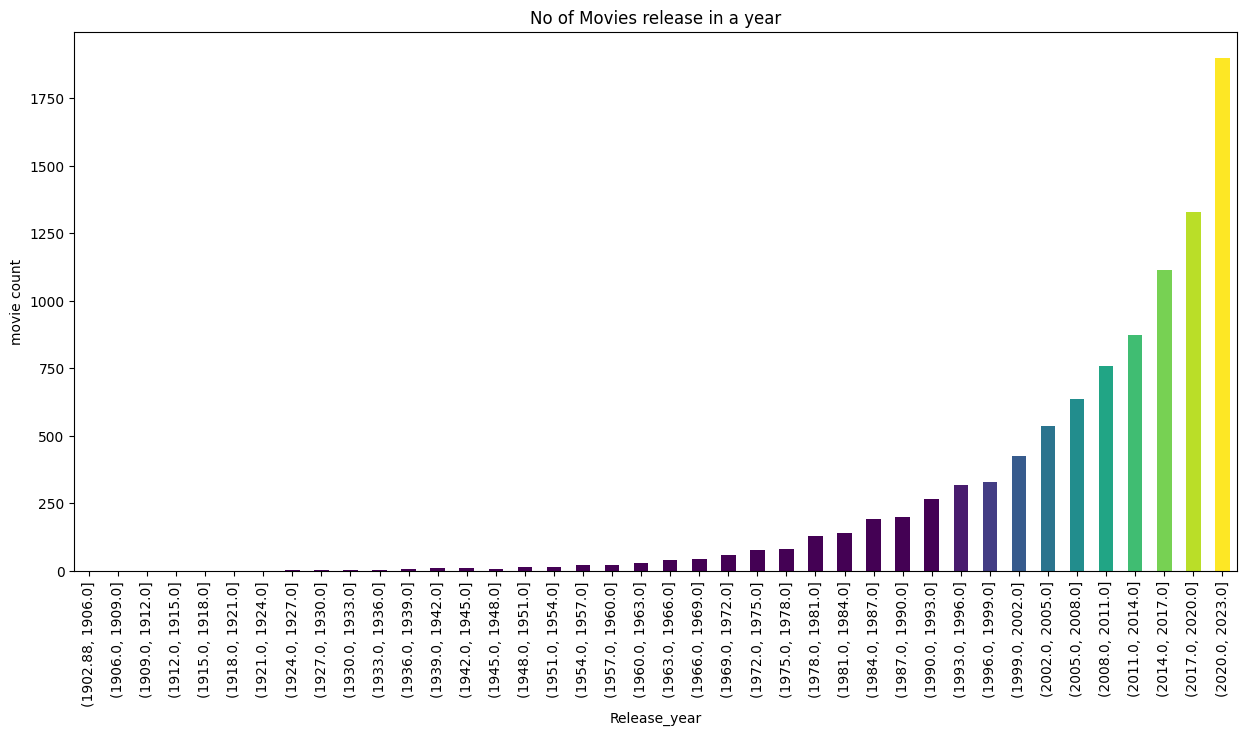

In [14]:
# plot  between year and number of movies

colors = plt.cm.viridis(np.linspace(-3, 1, 40))  #to create some color combinations
plt.figure(figsize=(15,7))
data.groupby(pd.cut(data["Release_year"],bins=40))["names"].agg("count").plot(kind="bar",color=colors)
plt.title("No of Movies release in a year")
plt.ylabel("movie count")
plt.show()

## Result :  In years basics the movies count is increasing faster

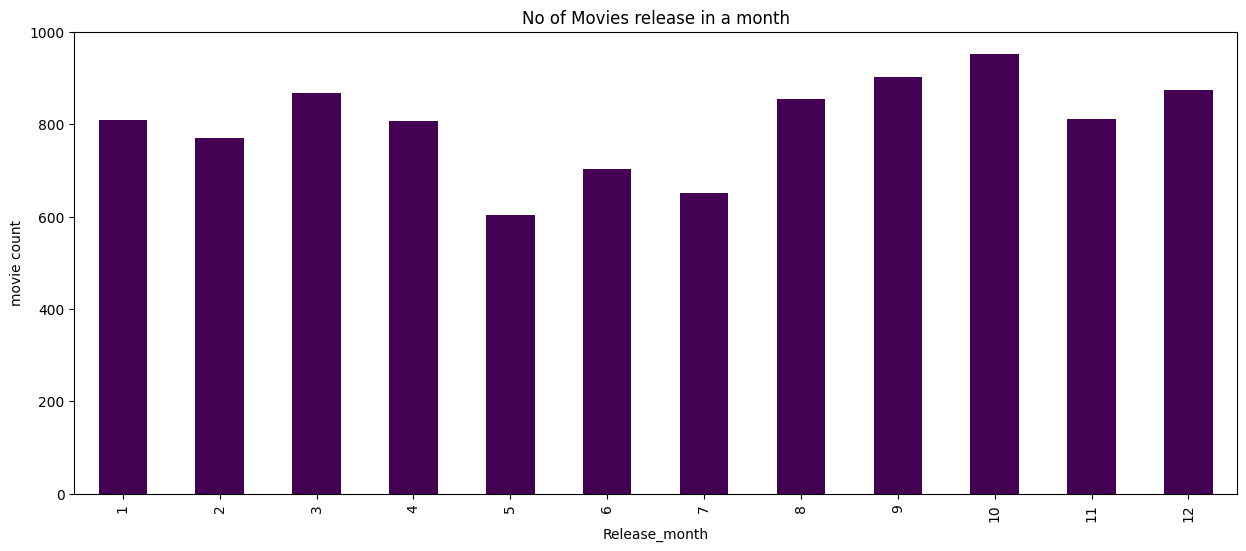

In [15]:
#plot between month and number of movies
plt.figure(figsize=(15,6))

data.groupby("Release_month")["names"].agg("count").plot(kind="bar",color=colors)

#data.groupby("Release_month")["names"].agg("count").plot(kind="line",color="red")

plt.title("No of Movies release in a month")
plt.ylabel("movie count")
plt.show()


# Result :  The  movie count is less in "JUNE ,JULY, AUGUST "Month  -------->
#           More movies are released in "october" month

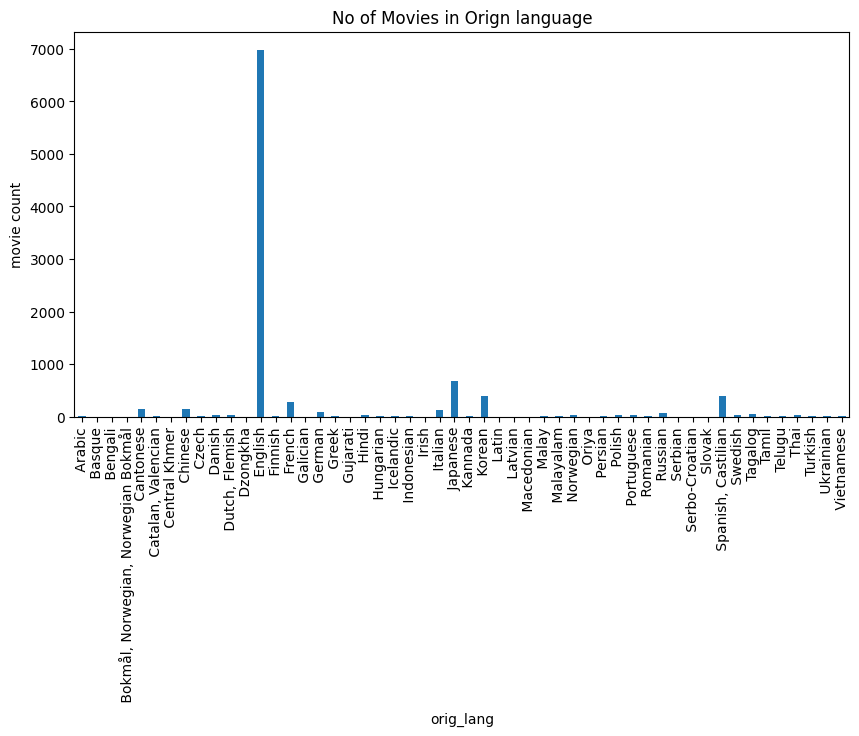

In [16]:
# plot between no of movies in their orgin language
plt.figure(figsize=(10,5))
data.groupby("orig_lang")["names"].agg("count").plot(kind="bar")
plt.title("No of Movies in Orign language")
plt.ylabel("movie count")
plt.show()

# Result  : 
## There are more number of movie released in "English" language as orgin
##   Remaining  count are less then 1000.

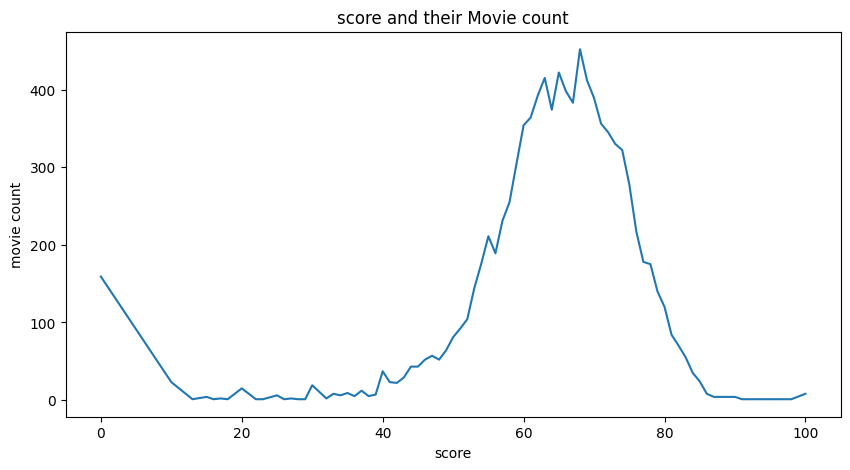

In [17]:
# plot depend on score 
plt.figure(figsize=(10,5))
data.groupby("score")["names"].agg("count").plot(kind="line")
plt.title("score and their Movie count")
plt.ylabel("movie count")
plt.show()

# Result : 
## The average movie score between 55 - 75

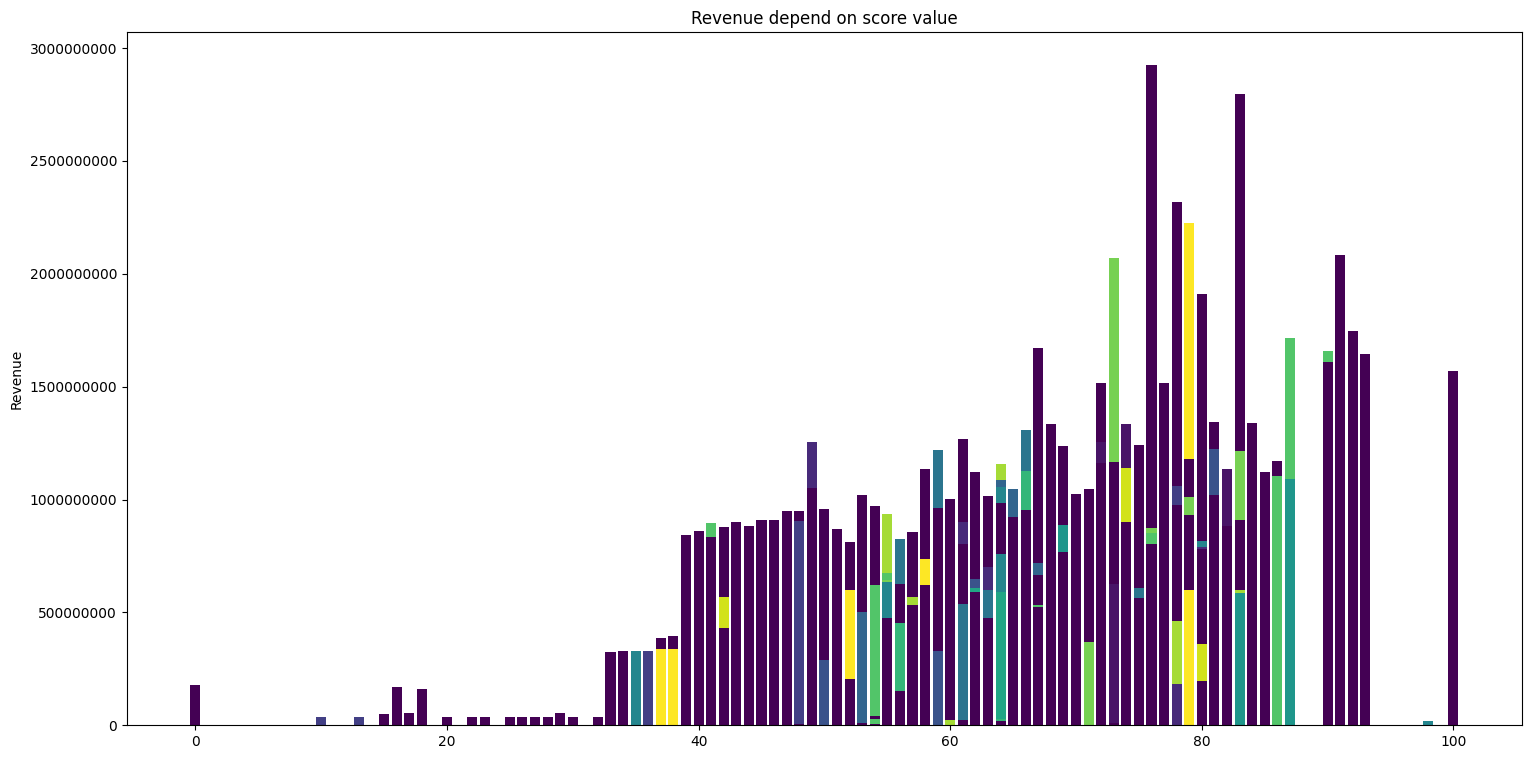

In [18]:
#import the module for remove the "le6" at y axis and formate it

from matplotlib.ticker import ScalarFormatter
plt.figure(figsize=(18,9))
colors = plt.cm.viridis(np.linspace(-3, 1, 60))
plt.bar(data["score"],data["revenue"],color=colors)

plt.ticklabel_format(axis='y', style='plain')
plt.title("Revenue depend on score value")
plt.ylabel("Revenue")
plt.show()

# Result : 
## The high revenue movies are range between 75-85 score

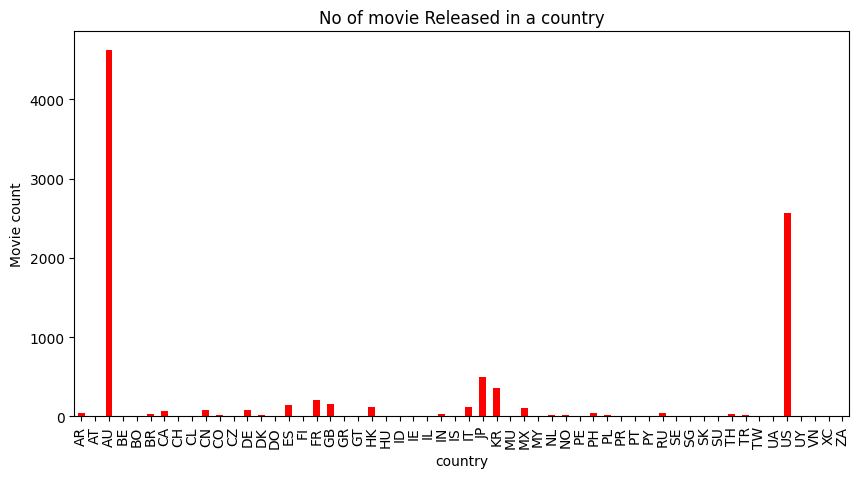

In [19]:
# plot depends  on country and movies
plt.figure(figsize=(10,5))
data.groupby("country")["names"].agg("count").plot(kind="bar",color="red")
plt.title("No of movie Released in a country")
plt.ylabel("Movie count")
plt.show()

# Result  :
## There are more movie release in "1) AUSTRALIA ( AU ) ----  2) UNITED STATES( US )

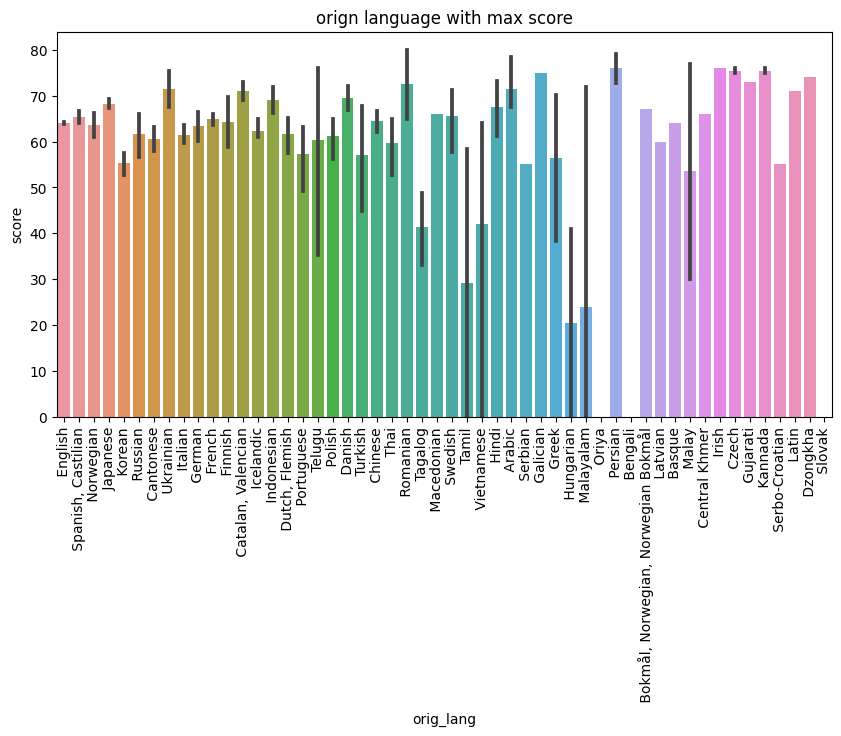

In [20]:
# plot the score  with orign language

from matplotlib.ticker import ScalarFormatter
plt.figure(figsize=(10,5))

sns.barplot(data,x=data["orig_lang"],y=data["score"])
plt.xticks(rotation=90)
plt.title("orign language with max score")
plt.ylabel("score")
plt.show()


# Result  :
## The average score for the orign language  : it denote  [ "Tamil, malayalam, Hungarian ]  has less score value 

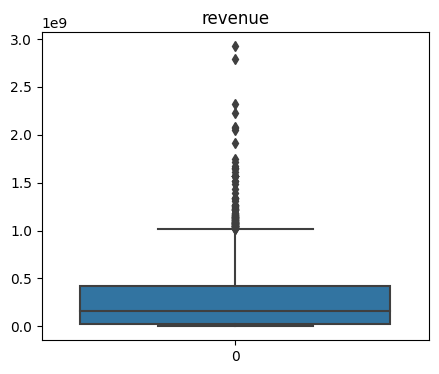

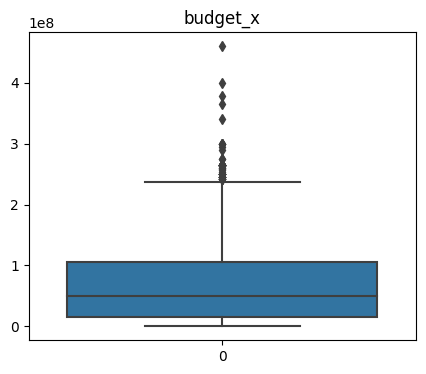

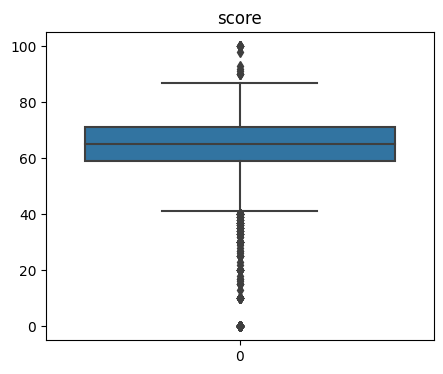

In [21]:
# to find some outliers
for i in data[["revenue","budget_x","score"]]:
    plt.figure(figsize=(5,4))
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()


<div style="
    padding: 40px;
    color: #4b4Ab;
    margin: 20px;
    font-size: 30px;
    display: block;
    border-radius: 10px;
    border: 3px solid #ed0c26;
    background-color: #46f0c5;
    overflow: hidden;
    font-weight: 600;
    box-shadow: 0 4px 6px rgba(0, 0, 0, 0.5);
">
    <strong style="color:BLACK;padding : 150px">Movie Recommendation system</strong>
</div>


In [22]:
# importing basic library for movie recommendation
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [23]:
recom_data['index'] = range(0, len(recom_data))     # creating new column "index" 

recom_data = recom_data.set_index('index').reset_index() # move the column to begining of the dataset

In [24]:
# select the  reqired column for find some patterns between each movies
selected_features = ['genre','crew',"orig_lang"]
print(selected_features)

for feature in selected_features:
    recom_data[feature] = recom_data[feature].fillna('')

    
# combining all the 5 selected features
 
combined_features = recom_data['genre']+' '+recom_data['overview']+' '+recom_data['crew']


['genre', 'crew', 'orig_lang']


In [25]:
# initialize the model  
vectorizer = TfidfVectorizer()

# fit the data into the  model
feature_vectors = vectorizer.fit_transform(combined_features)

# getting the similarity scores using cosine similarity
similarity = cosine_similarity(feature_vectors)

In [46]:
# make the recommendation based on your movie which you like 
# get input of the movie_name

# movie_name =input('Enter your favourite movie name : ')

# here we define some default name  -----> otherwise you can get it from user 
movie_name = "creed"
print('Enter your favourite movie name : Iron man')

list_of_all_titles = recom_data['names'].tolist()       # get all movie name as list

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)  # find closest match --list of movie-- form oru given movie
print(" similiar names  :  ",  find_close_match ,"\n\n")

close_match = find_close_match[0]             # we take first one which is given by cloest movie

index_of_the_movie = recom_data[recom_data.names == close_match]['index'].values[0]   #  geting the index of the movie

similarity_score = list(enumerate(similarity[index_of_the_movie]))            # generate the similarity score for the given movie
        
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)     # sort the score to get top 10 more similiarty movies

print('Movies suggested for you : \n')

i = 1

# print the top 10 movies base on similiarity score 
  
for movie in sorted_similar_movies:
    index = movie[0]
    title_from_index = recom_data[recom_data.index==index]['names'].values[0]
    if (i<10):
        print(i, '.',title_from_index)
        i+=1



Enter your favourite movie name : Iron man
 similiar names  :   ['Creed', 'Greedy', 'Scorned'] 


Movies suggested for you : 

1 . Creed
2 . Creed II
3 . Creed III
4 . Rocky III
5 . Rocky II
6 . Rocky V
7 . Rocky IV
8 . Rocky Balboa
9 . Rocky



<div style="
    padding: 30px;
    color: #4b4Ab;
    margin: 20px;
    font-size: 15px;
    display: inline-block;
    border-radius: 10px;
    border: 3px solid #f0ed43;
    background-color: #cbf5f3;
    overflow: hidden;
    font-weight: 600;
    box-shadow: 0 4px 6px rgba(0, 0, 0, 0.5);
">
    <strong style="color:black;padding : 10px">Based on given data we find similiarity <br> and genrate some recommendation </strong>
</div>





<div style="
    padding: 30px;
    color: #4b4Ab;
    margin: 20px;
    font-size: 30px;
    display: block;
    border-radius: 10px;
    border: 3px solid #f0ed43;
    background-color: #b80419;
    overflow: hidden;
    font-weight: 600;
    box-shadow: 0 4px 6px rgba(0, 0, 0, 0.5);
">
    <strong style="color:#e8f22c;padding : 130px">Revenue Pridection Model Building</strong>
</div>


In [27]:
# importing basic libraries for model building

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
import xgboost as xgb



In [28]:
# done some data processing for model building
data = pd.concat([data, data['genre'].str.get_dummies(',')], axis=1)


In [29]:
val1=data.iloc[:,14:]
val2=data.loc[:,["score","budget_x"]]

new_data=pd.concat([val1,val2],axis=1)



In [30]:
# to check the co-relation between the "revenue " and other columns

numeric_columns = data.select_dtypes(include=['float64', 'int64','int32']).columns

for i in numeric_columns:
    if i != "revenue":  # Exclude the target column
        correlation = data["revenue"].corr(data[i])
        print(f"{i}: {correlation}")

score: 0.09444800931384487
budget_x: 0.6811713916249421
Release_year: 0.16208033508377456
Release_month: 0.024178787449608625
Action: -0.02066863355713167
Adventure: 0.010677887585511702
Animation: 0.15578816950406615
Comedy: -0.06804032098577088
Crime: -0.0507766954823246
Documentary: 0.12715187241578946
Drama: -0.04845662373703771
Family: 0.05009769663727455
Fantasy: -0.0016359993313042368
History: 0.007656477534939855
Horror: -0.0672326836922559
Music: 0.018708708033632924
Mystery: -0.0016191221363921725
Romance: 0.03561099513180364
Science Fiction: 0.00018200733002213918
TV Movie: 0.04994514482384475
Thriller: -0.015760533689670852
War: -0.008678673024428301
Western: -0.01984172069086076
 Action: 0.023289602742958184
 Adventure: 0.07634481122690615
 Animation: 0.08661639340418807
 Comedy: 0.04664394830356514
 Crime: -0.06636773902664668
 Documentary: 0.049313723656241565
 Drama: -0.051405753021153924
 Family: 0.07256843741882975
 Fantasy: 0.0767818194093739
 History: -0.04684319547

In [31]:
numerical=["budget_x","score","Release_year"]

#  initialize the  independent values in "x"  _________dependent or target in "y"

x = data[["budget_x","score","Release_year"]]
y = data["revenue"]


In [32]:
# split the x,y train and test data  using "train_test_split"   20% ---> test  :  80% ---> train

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

print(x_train.shape,x_test.shape)


(7691, 3) (1923, 3)


In [33]:
# importing module for data preprocessing  

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  StandardScaler,MinMaxScaler

# here we scale the orginal data and normailze the data
column_transformer = ColumnTransformer(
    transformers=[

        ('scaler', MinMaxScaler(), numerical)
    ],
    remainder='passthrough'
)

# Fit and transform the data
featured_xtrain = column_transformer.fit_transform(x_train)

featured_xtest = column_transformer.transform(x_test)



In [34]:
# Initialize the required model 
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200,ccp_alpha=0.1,criterion="poisson",min_samples_split=60)     

model_xgb = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.2, learning_rate = 1.5,
                max_depth = 300, alpha = 2, n_estimators = 10)

In [35]:
# fit the dependent and independent data to the model
model.fit(featured_xtrain,y_train)

RandomForestRegressor(ccp_alpha=0.1, criterion='poisson', min_samples_split=60,
                      n_estimators=200)

In [36]:
# fit the dependent and independent data to the model
model_xgb.fit(featured_xtrain,y_train)

XGBRegressor(alpha=2, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.2, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=300, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

In [37]:
# make prediction by using train dataset
score = model.predict(featured_xtrain)
score_xgb = model_xgb.predict(featured_xtrain)


In [38]:
# make prediction by using test dataset
score_in_test =  model.predict(featured_xtest)
xgb_score_in_test= model_xgb.predict(featured_xtest)

In [39]:
from sklearn import metrics                 
# Import the module  for check prediction score

# here we use two different methods
# 1) mean_squared_error  2)r2_score

In [40]:
# use the train data score to find accuracy

model_score= metrics.mean_squared_error(y_train,score)                             # Randomforest regression 
model_score_xgb= metrics.mean_squared_error(y_train,score_xgb)                     # XGBOSTER

r2_score= metrics.r2_score(y_train,score)                                           # Randomforest regression 
r2_score_xgb=  metrics.r2_score(y_train,score_xgb)                                  # XGBOSTER



In [41]:
# use the test data score to find accuracy


model_score_test= metrics.mean_squared_error(y_test,score_in_test)                    # Randomforest regression 
model_score_xgb_test= metrics.mean_squared_error(y_test,xgb_score_in_test)            # XGBOSTER

r2_score_test = metrics.r2_score(y_test,score_in_test)                                 # Randomforest regression 
r2_score_xgb_test =  metrics.r2_score(y_test,xgb_score_in_test)                        # XGBOSTER

In [42]:
print("Mean squared error in Random forest: \n","\ntrain data :",model_score,"\ntest data: ",model_score_test)
print("\n\nR2 score in Random forest: \n","\ntrain data :",r2_score,"\ntest data: ",r2_score_test)
print("\n\n")
print("Mean squared error in XGBoost : \n","\ntrain data :",model_score_xgb,"\ntest data: ",model_score_xgb_test)
print("\n\nR2 score in  XGBoost: \n","\ntrain data :",r2_score_xgb,"\ntest data: ",r2_score_xgb_test)

Mean squared error in Random forest: 
 
train data : 2.101331563521705e+16 
test data:  2.1938025853046824e+16


R2 score in Random forest: 
 
train data : 0.7314830874489016 
test data:  0.6805476459139042



Mean squared error in XGBoost : 
 
train data : 2.682386979952635e+16 
test data:  2.5434369156307504e+16


R2 score in  XGBoost: 
 
train data : 0.6572334025587928 
test data:  0.6296353575247162


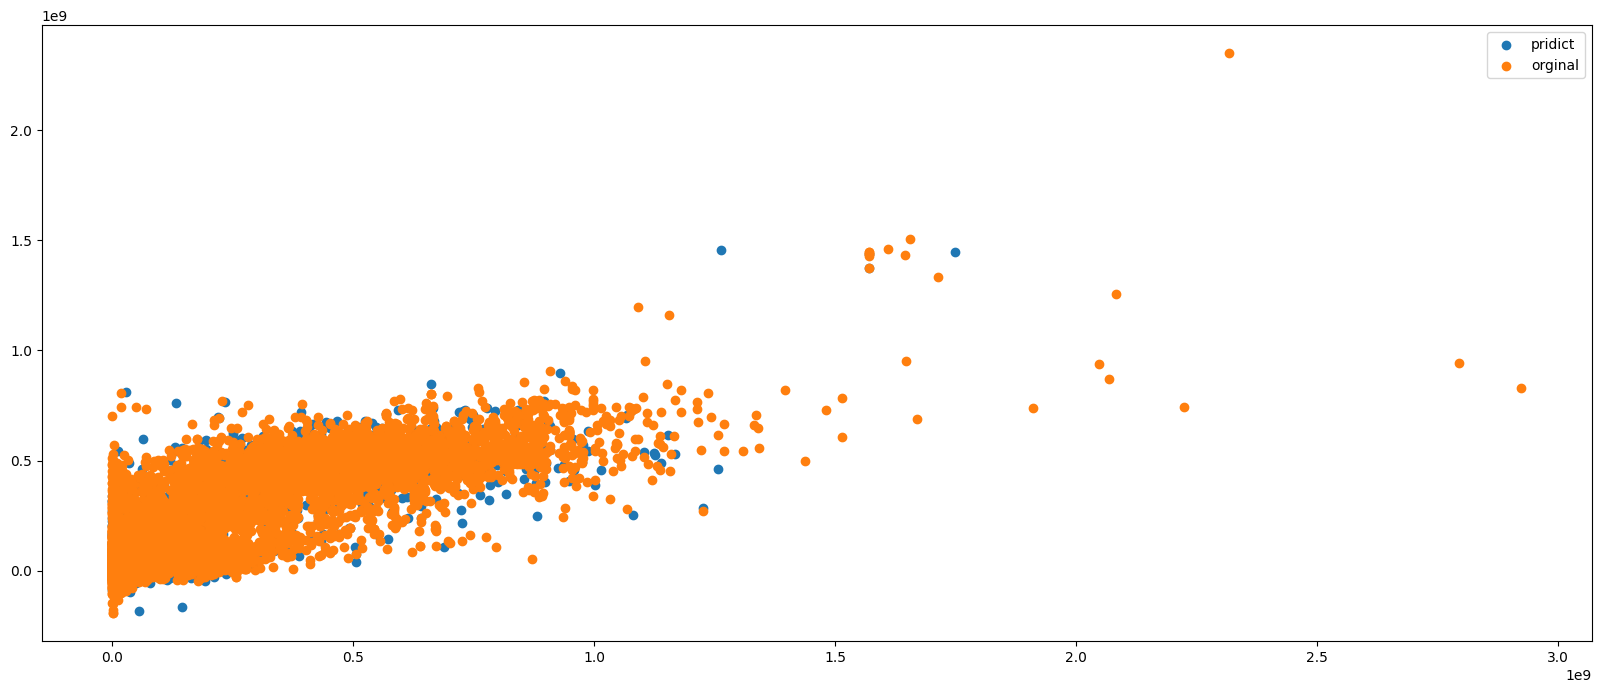

In [43]:
plt.figure(figsize=(20,8))
plt.scatter(y_test,xgb_score_in_test)
plt.scatter(y_train,score_xgb)
plt.legend(["pridict","orginal"])

plt.show()

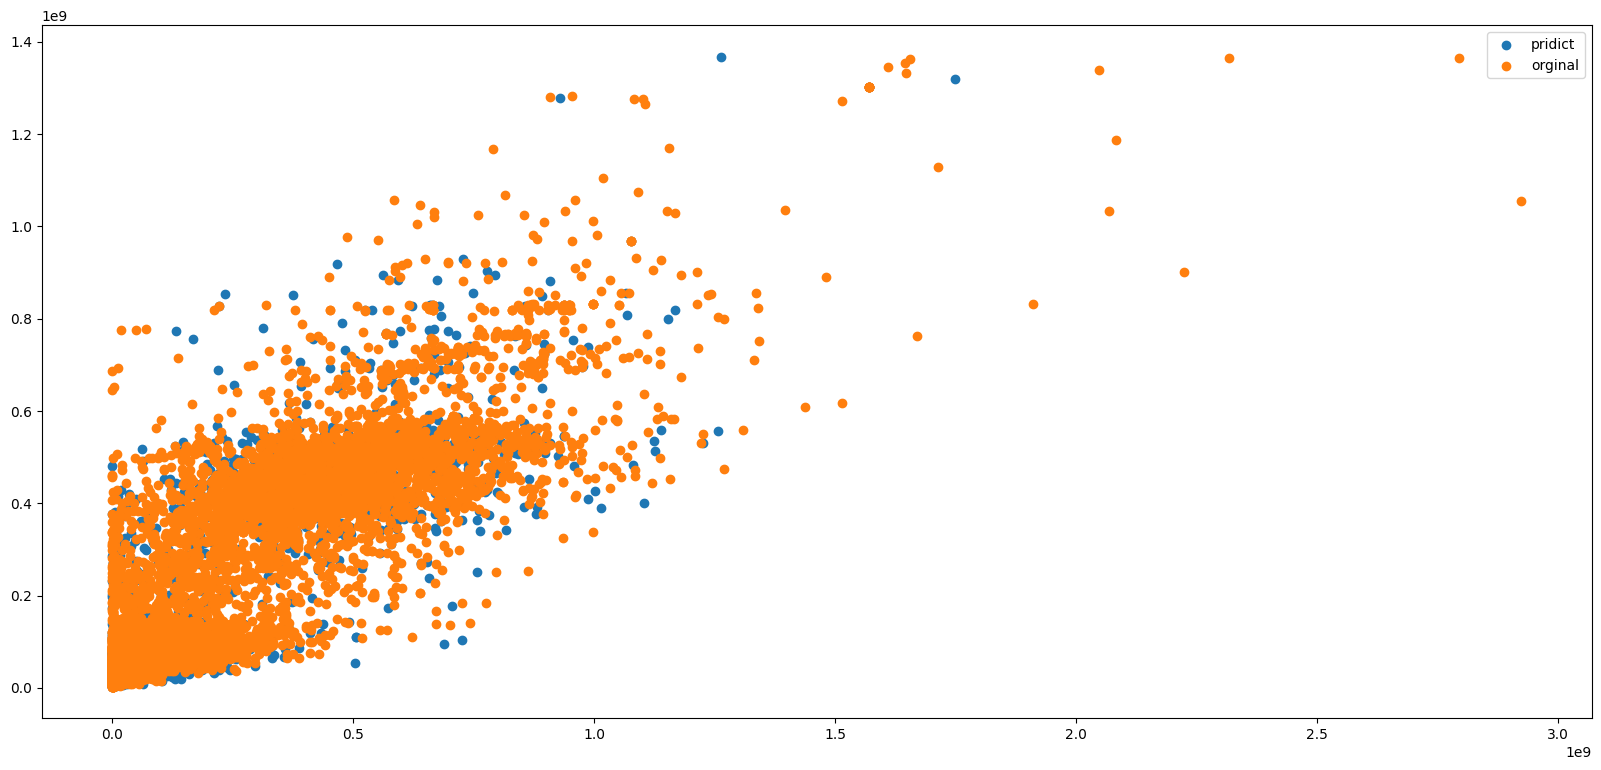

In [44]:
plt.figure(figsize=(20,9))
plt.scatter(y_test,score_in_test)
plt.scatter(y_train,score)
plt.legend(["pridict","orginal"])

plt.show()


<div style="
    padding: 30px;
    color: #4b4Ab;
    margin: 20px;
    font-size: 35px;
    display: block;
    border-radius: 10px;
    border: 3px solid #f0ed43;
    background-color: #f51651;
    overflow: hidden;
    font-weight: 600;
    box-shadow: 0 4px 6px rgba(0, 0, 0, 0.5);
">
    <strong style="color:BLACK;padding : 200px">[---THANK YOU---]</strong>
</div>
